# Data Import

In [67]:
#import relevant libraries
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from google.colab import drive

#import dataset from drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv')

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Visualization

In [68]:
#print the averages and range of values for the dataset
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


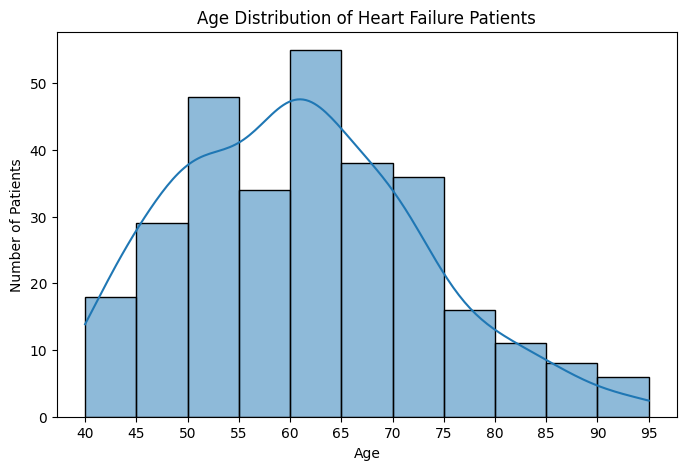

In [69]:
#histogram figure of the age distribution of heart failure patients
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='age', bins=range(int(data['age'].min()), int(data['age'].max()) + 5, 5), kde=True, edgecolor='black')
plt.xticks(range(int(data['age'].min()), int(data['age'].max()) + 5, 5))
plt.title('Age Distribution of Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

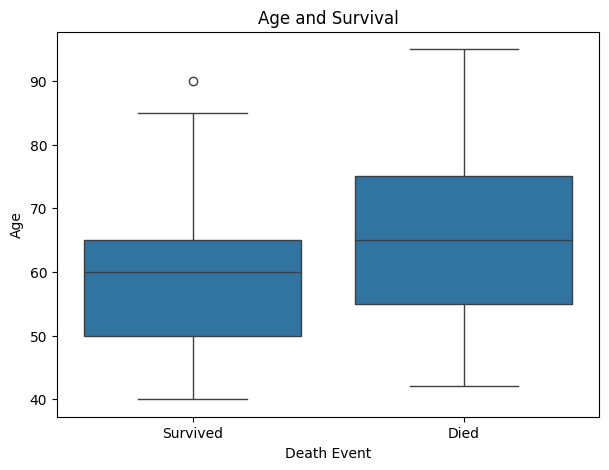

In [70]:
#box plot of the age distribution of those who survived and those who didn't
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x="DEATH_EVENT", y="age")
plt.xticks([0,1], ["Survived", "Died"])
plt.title("Age and Survival")
plt.xlabel("Death Event")
plt.ylabel("Age")
plt.show()

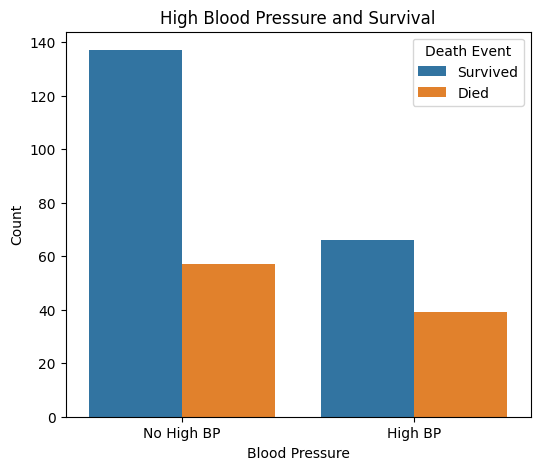

In [71]:
#bar plot of high blood pressure vs survival
plt.figure(figsize=(6,5))
sns.countplot(data=data, x="high_blood_pressure", hue="DEATH_EVENT")
plt.xticks([0,1], ["No High BP", "High BP"])
plt.legend(title="Death Event", labels=["Survived", "Died"])
plt.title("High Blood Pressure and Survival")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()

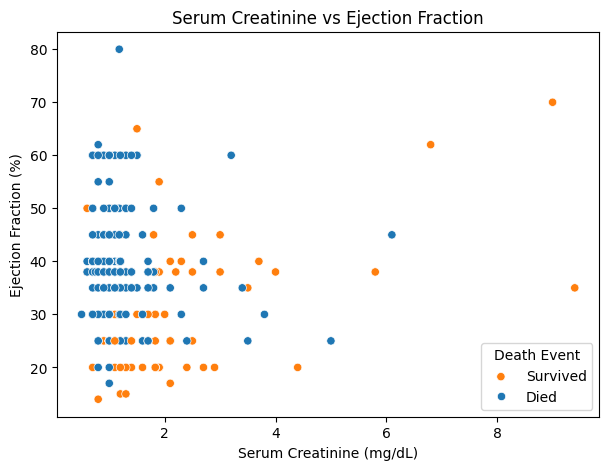

In [72]:
#scatterplot of serum creatinine vs ejection fraction
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x="serum_creatinine", y="ejection_fraction", hue="DEATH_EVENT")
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("Ejection Fraction (%)")
plt.title("Serum Creatinine vs Ejection Fraction")
plt.legend(title="Death Event", labels=["Survived", "Died"])
plt.show()

# Data Split

In [73]:
#split the features + target
X_data = data[["serum_creatinine", "ejection_fraction"]]
y_data = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=75)

print("shape of X_train:")
print("", X_train.shape, "\n")
print("shape of y_train:")
print("", y_train.shape, "\n")
print("shape of X_test:")
print("", X_test.shape, "\n")
print("shape of y_test:")
print("", y_test.shape, "\n")

shape of X_train:
 (239, 2) 

shape of y_train:
 (239,) 

shape of X_test:
 (60, 2) 

shape of y_test:
 (60,) 



# Logistic Regression

In [74]:
#create a pipeline using logistic regression model
log_reg_pipe = Pipeline([('scaler', StandardScaler()), ('log_reg', LogisticRegression(max_iter=2000))])
log_reg_pipe.fit(X_train, y_train)
y_pred_lr = log_reg_pipe.predict(X_test)

#display accuracy of the
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Accuracy for Logistic Regression: ", lr_acc)

Accuracy for Logistic Regression:  0.7333333333333333


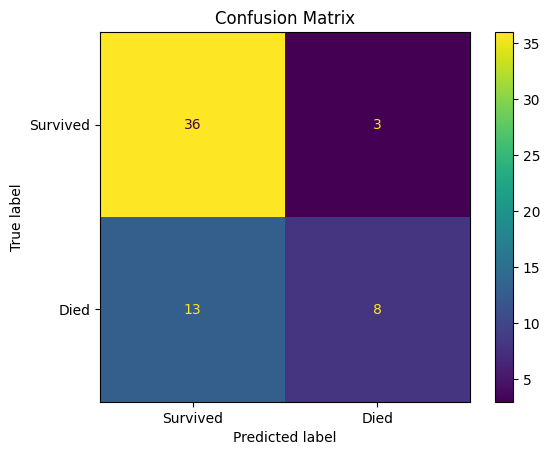


Sensitivity of Logistic Regression:  0.38095238095238093 

Specificity of Logistic Regression:  0.9230769230769231


In [75]:
#display the confusion matrix and sens/spec statistics
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm_display = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Survived", "Died"])
lr_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = lr_cm.ravel()
lr_sensitivity = tp / (tp + fn)
lr_specificity = tn / (tn + fp)

print("\nSensitivity of Logistic Regression: ", lr_sensitivity, "\n")
print("Specificity of Logistic Regression: ", lr_specificity)

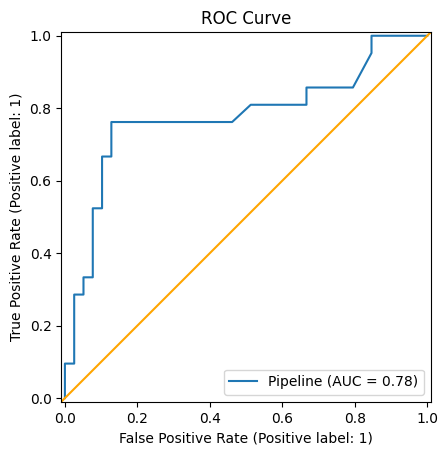

In [76]:
#display roc/auc curve
roc_display = RocCurveDisplay.from_estimator(log_reg_pipe, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

# Support Vector Machine (SVM)

In [77]:
#create pipeline for the svm model
svm_pipe = Pipeline([('scaler', StandardScaler()), ('svm', SVC())])
svm_pipe.fit(X_train, y_train)
y_pred_svm = svm_pipe.predict(X_test)

#display accuracy for model
svm_acc = accuracy_score(y_test, y_pred_svm)
print("Accuracy for SVM: ", svm_acc)

Accuracy for SVM:  0.7666666666666667


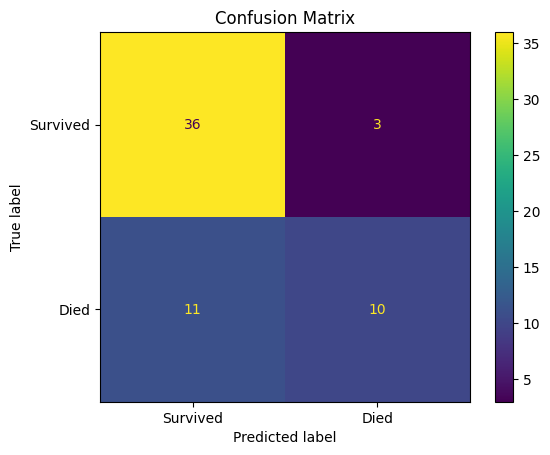


Sensitivity of SVM:  0.47619047619047616 

Specificity of SVM:  0.9230769230769231


In [78]:
#create confusion matrix and sens/spec statistics
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=["Survived", "Died"])
svm_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = svm_cm.ravel()
svm_sensitivity = tp / (tp + fn)
svm_specificity = tn / (tn + fp)

print("\nSensitivity of SVM: ", svm_sensitivity, "\n")
print("Specificity of SVM: ", svm_specificity)

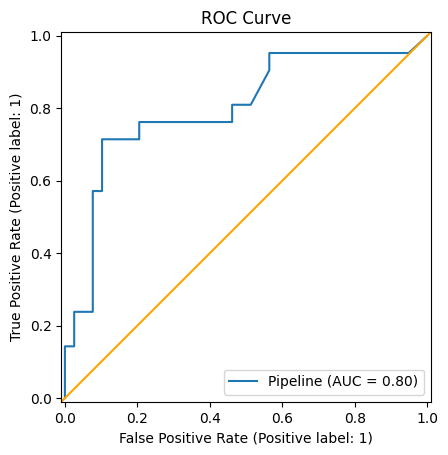

In [79]:
#diplay roc/auc statistics
roc_display = RocCurveDisplay.from_estimator(svm_pipe, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

# Random Forest

In [80]:
#create pipeline for random forest model
rf_pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=200, random_state=75))])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

#display the accuracy for model
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest: ", rf_acc)

Accuracy for Random Forest:  0.7


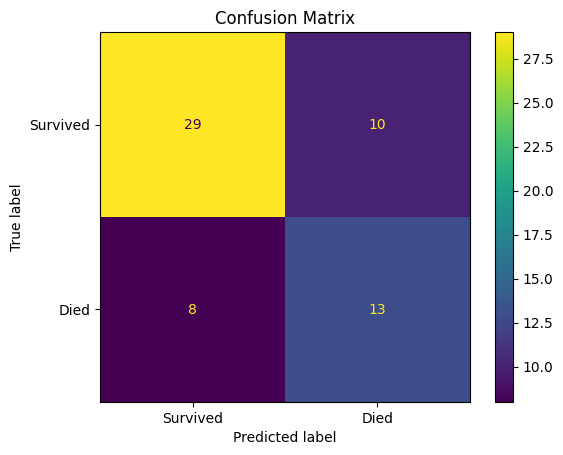


Sensitivity of Random Forest:  0.6190476190476191 

Specificity of Random Forest:  0.7435897435897436


In [81]:
#create confusion matrix and sens/spec statistics
rf_cm = confusion_matrix(y_test, y_pred_rf)
rf_cm_display = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=["Survived", "Died"])
rf_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = rf_cm.ravel()
rf_sensitivity = tp / (tp + fn)
rf_specificity = tn / (tn + fp)

print("\nSensitivity of Random Forest: ", rf_sensitivity, "\n")
print("Specificity of Random Forest: ", rf_specificity)

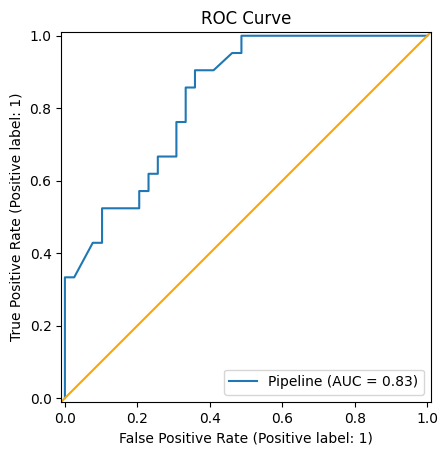

In [82]:
#display roc/auc statistics
roc_display = RocCurveDisplay.from_estimator(rf_pipe, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

## Random Forest with K-fold Cross Validation

In [83]:
data_idx = np.arange(len(X_train))
kf = KFold(n_splits=5, shuffle=True, random_state=75)
k = 0
best_accuracy = np.inf

for idx_train, idx_val in kf.split(data_idx):
  X_train_k = X_train.iloc[idx_train]
  y_train_k = y_train.iloc[idx_train]

  X_val = X_train.iloc[idx_val]
  y_val = y_train.iloc[idx_val]

  pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier(n_estimators=200, random_state=75))])
  pipe.fit(X_train_k, y_train_k)
  y_pred_k = pipe.predict(X_val)

  accuracy = accuracy_score(y_val, y_pred_k)
  print("accuracy ", k, ": ", accuracy)
  k = k + 1

  if accuracy < best_accuracy:
    best_model = copy.deepcopy(pipe)
    best_accuracy = accuracy

y_pred_rfcv = best_model.predict(X_test)
rfcv_acc = accuracy_score(y_test, y_pred_rfcv)
print("Accuracy for Random Forest with Cross-Validation: ", rfcv_acc)

accuracy  0 :  0.7916666666666666
accuracy  1 :  0.8333333333333334
accuracy  2 :  0.6458333333333334
accuracy  3 :  0.7291666666666666
accuracy  4 :  0.7021276595744681
Accuracy for Random Forest with Cross-Validation:  0.7666666666666667


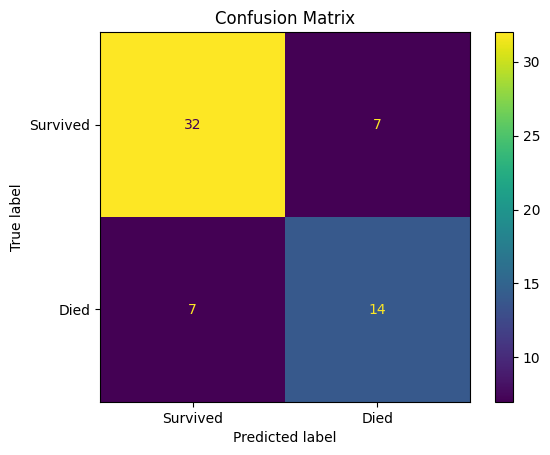


Sensitivity of Random Forest with Cross-Validation:  0.6666666666666666 

Specificity of Random Forest with Cross-Validation:  0.8205128205128205


In [84]:
#create confusion matrix and roc/auc statistics
rfcv_cm = confusion_matrix(y_test, y_pred_rfcv)
rfcv_cm_display = ConfusionMatrixDisplay(confusion_matrix=rfcv_cm, display_labels=["Survived", "Died"])
rfcv_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = rfcv_cm.ravel()
rfcv_sensitivity = tp / (tp + fn)
rfcv_specificity = tn / (tn + fp)

print("\nSensitivity of Random Forest with Cross-Validation: ", rfcv_sensitivity, "\n")
print("Specificity of Random Forest with Cross-Validation: ", rfcv_specificity)

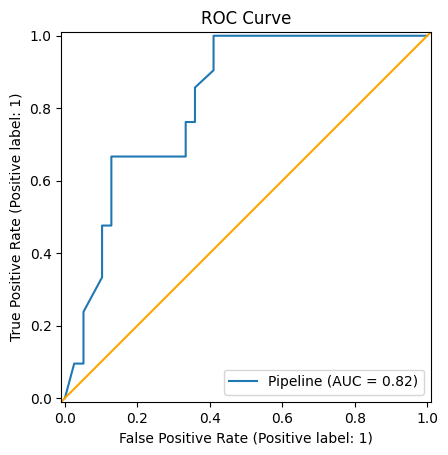

In [85]:
#display roc/auc statistics
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

# Decision Tree

In [86]:
best_depth = -np.inf

for i in range(1, 6, 1):
  #create pipeline for decision tree model
  pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(max_depth=i, random_state=75))])
  pipe.fit(X_train, y_train)
  y_pred_dt = pipe.predict(X_test)

  #display accuracy for model
  dt_acc = accuracy_score(y_test, y_pred_dt)
  print("Accuracy for Decision Tree with max_depth =", i, ": ", dt_acc)

  if dt_acc > best_depth:
    dt_pipe = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(max_depth=i, random_state=75))])
    best_depth = dt_acc

dt_pipe.fit(X_train, y_train)
y_pred_dt = dt_pipe.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("\nSaved Accuracy for Decision Tree: ", dt_acc)

Accuracy for Decision Tree with max_depth = 1 :  0.75
Accuracy for Decision Tree with max_depth = 2 :  0.8166666666666667
Accuracy for Decision Tree with max_depth = 3 :  0.7833333333333333
Accuracy for Decision Tree with max_depth = 4 :  0.7666666666666667
Accuracy for Decision Tree with max_depth = 5 :  0.7333333333333333

Saved Accuracy for Decision Tree:  0.8166666666666667


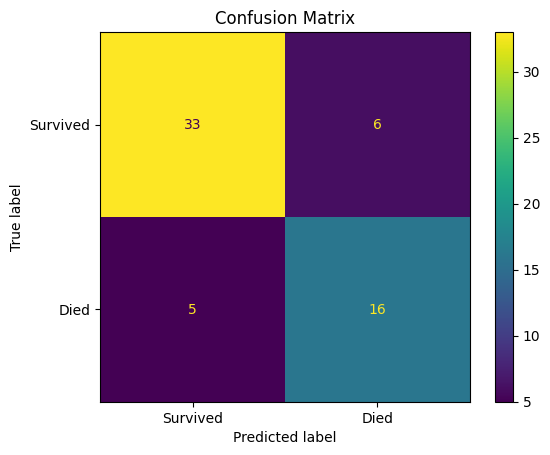


Sensitivity of Decision Tree:  0.7619047619047619 

Specificity of Decision Tree:  0.8461538461538461


In [87]:
#create confusion matrix and roc/auc statistics
dt_cm = confusion_matrix(y_test, y_pred_dt)
dt_cm_display = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=["Survived", "Died"])
dt_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = dt_cm.ravel()
dt_sensitivity = tp / (tp + fn)
dt_specificity = tn / (tn + fp)

print("\nSensitivity of Decision Tree: ", dt_sensitivity, "\n")
print("Specificity of Decision Tree: ", dt_specificity)

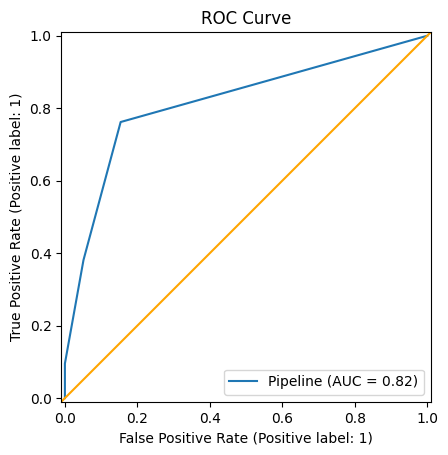

In [88]:
#display roc/auc statistics
roc_display = RocCurveDisplay.from_estimator(dt_pipe, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

# Multi-layer Perceptrons (MLP)

In [89]:
#create a pipeline for mlp model
mlp_pipe = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(hidden_layer_sizes=(150, ), random_state=75))])
mlp_pipe.fit(X_train, y_train)
y_pred_mlp = mlp_pipe.predict(X_test)

#display accuracy for model
mlp_acc = accuracy_score(y_test, y_pred_mlp)
print("Accuracy for MLP: ", mlp_acc)

Accuracy for MLP:  0.8166666666666667


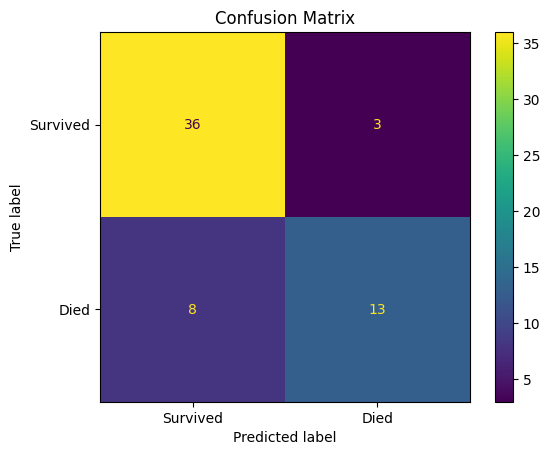


Sensitivity of MLP:  0.6190476190476191 

Specificity of MLP:  0.9230769230769231


In [90]:
#create confusion matrix and sens/spec statistics
mlp_cm = confusion_matrix(y_test, y_pred_mlp)
mlp_cm_display = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=["Survived", "Died"])
mlp_cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = mlp_cm.ravel()
mlp_sensitivity = tp / (tp + fn)
mlp_specificity = tn / (tn + fp)

print("\nSensitivity of MLP: ", mlp_sensitivity, "\n")
print("Specificity of MLP: ", mlp_specificity)

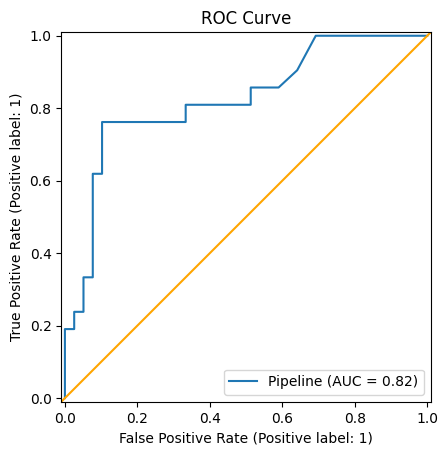

In [91]:
#display the roc/auc statistics
roc_display = RocCurveDisplay.from_estimator(mlp_pipe, X_test, y_test)
plt.axline((0, 0), slope=1, color= "orange")
plt.title("ROC Curve")
plt.show()

# Summary Results

In [92]:
#create a summary table with the statistics
results = [
    {"Model": "Logistic Regression", "Accuracy": lr_acc, "Sensitivity": lr_sensitivity, "Specificity": lr_specificity},
    {"Model": "SVM", "Accuracy": svm_acc, "Sensitivity": svm_sensitivity, "Specificity": svm_specificity},
    {"Model": "Random Forest", "Accuracy": rf_acc, "Sensitivity": rf_sensitivity, "Specificity": rf_specificity},
    {"Model": "Random Forest with Cross-Validation", "Accuracy": rfcv_acc, "Sensitivity": rfcv_sensitivity, "Specificity": rfcv_specificity},
    {"Model": "Decision Tree", "Accuracy": dt_acc, "Sensitivity": dt_sensitivity, "Specificity": dt_specificity},
    {"Model": "MLP", "Accuracy": mlp_acc, "Sensitivity": mlp_sensitivity, "Specificity": mlp_specificity}
]

results_df = pd.DataFrame(results)
print(results_df)

                                 Model  Accuracy  Sensitivity  Specificity
0                  Logistic Regression  0.733333     0.380952     0.923077
1                                  SVM  0.766667     0.476190     0.923077
2                        Random Forest  0.700000     0.619048     0.743590
3  Random Forest with Cross-Validation  0.766667     0.666667     0.820513
4                        Decision Tree  0.816667     0.761905     0.846154
5                                  MLP  0.816667     0.619048     0.923077


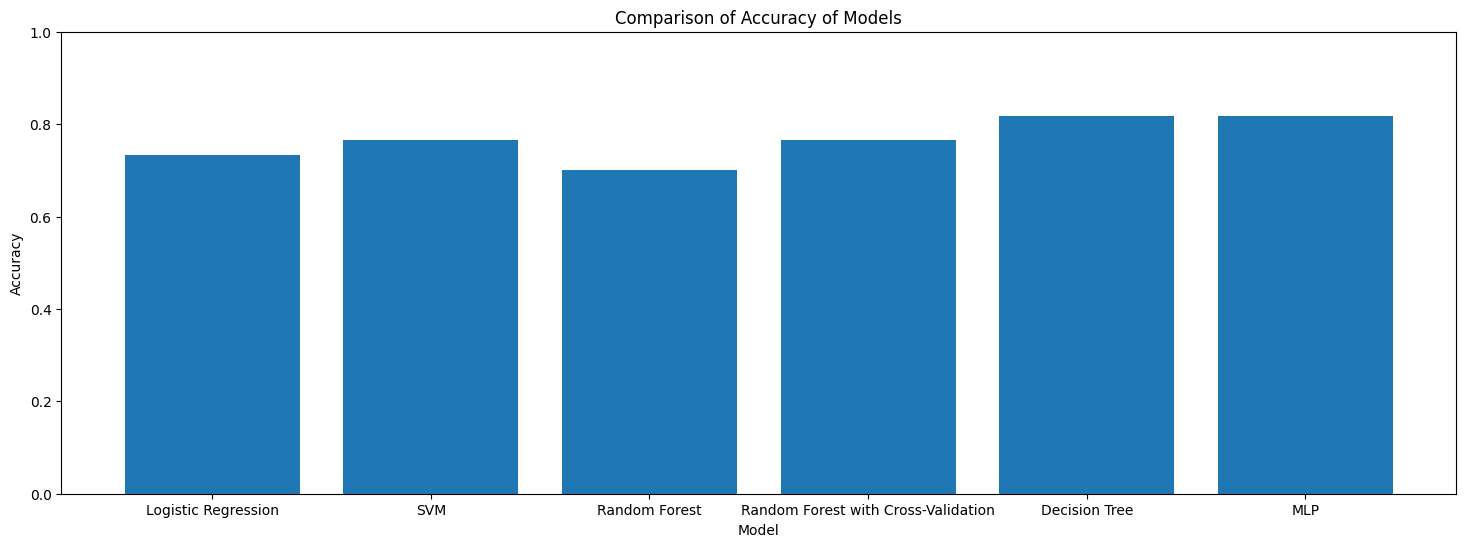

In [93]:
#barplot of model accuracy results
models = ["Logistic Regression", "SVM", "Random Forest", "Random Forest with Cross-Validation", "Decision Tree", "MLP"]
accuracy = [lr_acc, svm_acc, rf_acc, rfcv_acc, dt_acc, mlp_acc]

plt.figure(figsize=(18, 6))
plt.bar(models, accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of Models')
plt.ylim(0, 1)
plt.show()

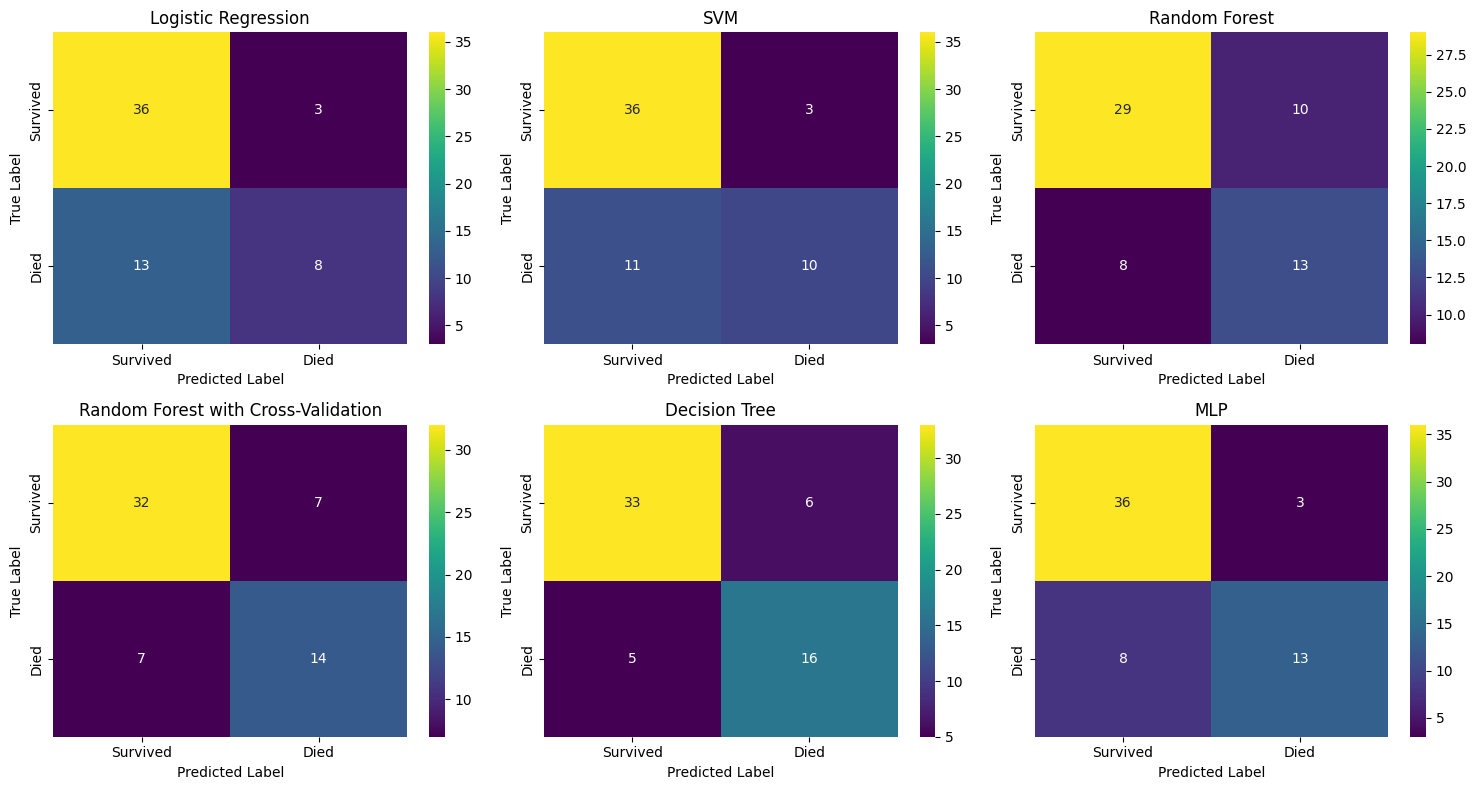

In [94]:
#combine all confusion matrices onto a plot
conf_matrices = {"Logistic Regression": lr_cm, "SVM": svm_cm, "Random Forest": rf_cm, "Random Forest with Cross-Validation": rfcv_cm,
                 "Decision Tree": dt_cm, "MLP": mlp_cm}

rows = int(np.ceil(len(models)/3))
cols = min(3, len(models))

plt.figure(figsize=(5*cols, 4*rows))

for i, (name, cm) in enumerate(conf_matrices.items(), 1):
    plt.subplot(rows, cols, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=["Survived", "Died"], yticklabels=["Survived", "Died"])
    plt.title(name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()


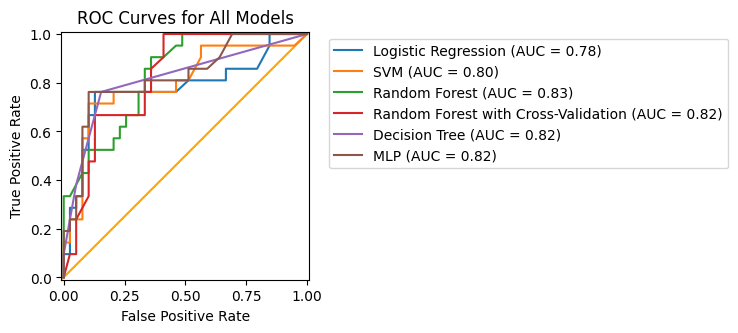

In [95]:
#create roc curves summary plot
pipes = {"Logistic Regression": log_reg_pipe, "SVM": svm_pipe, "Random Forest": rf_pipe, "Random Forest with Cross-Validation": best_model,
         "Decision Tree": dt_pipe, "MLP": mlp_pipe}

plt.axline((0, 0), slope=1, color= "orange")

for name, model in pipes.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca(), name=name)

plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()